## **Part 1: Predict the price of a house**

**Problem statement:** The goal is to understand the relationship between house features and how these variables affect the house price. 
Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


**It seem that we have some issue to transaction date won't include that fearure for this experiment.**

In [ ]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


**Distribution of features**

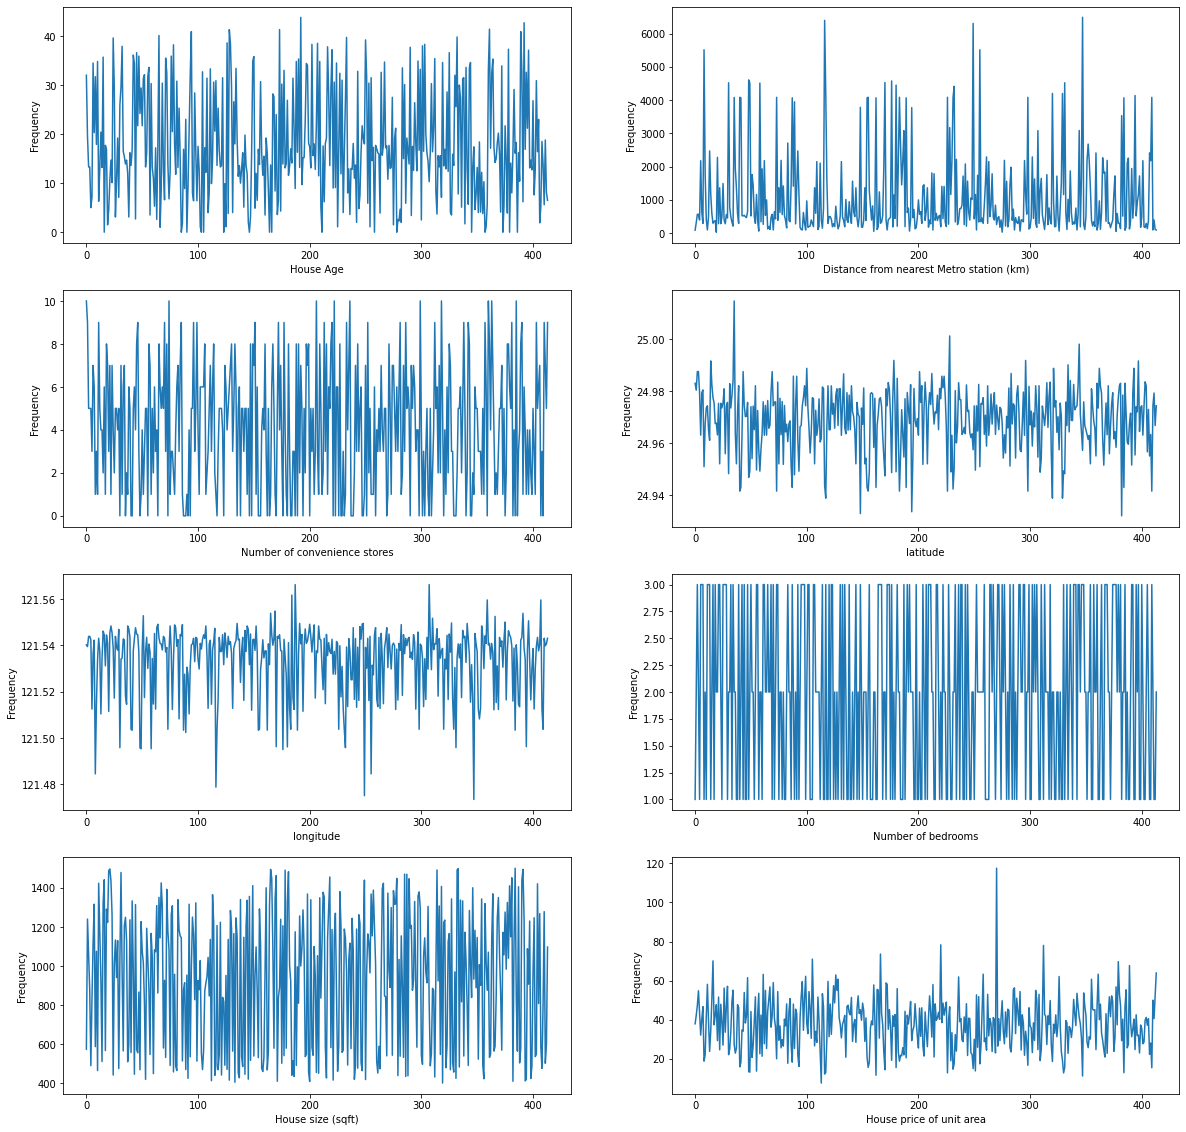

In [ ]:
i=0
plt.figure(figsize=(20,20))
for col in df.columns:
  if col=='Transaction date':
    continue
  plt.subplot(420+1+i)
  plt.plot(df[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  i+=1
plt.show()
  

**Other Feature vs Price**

Trying to find pattern

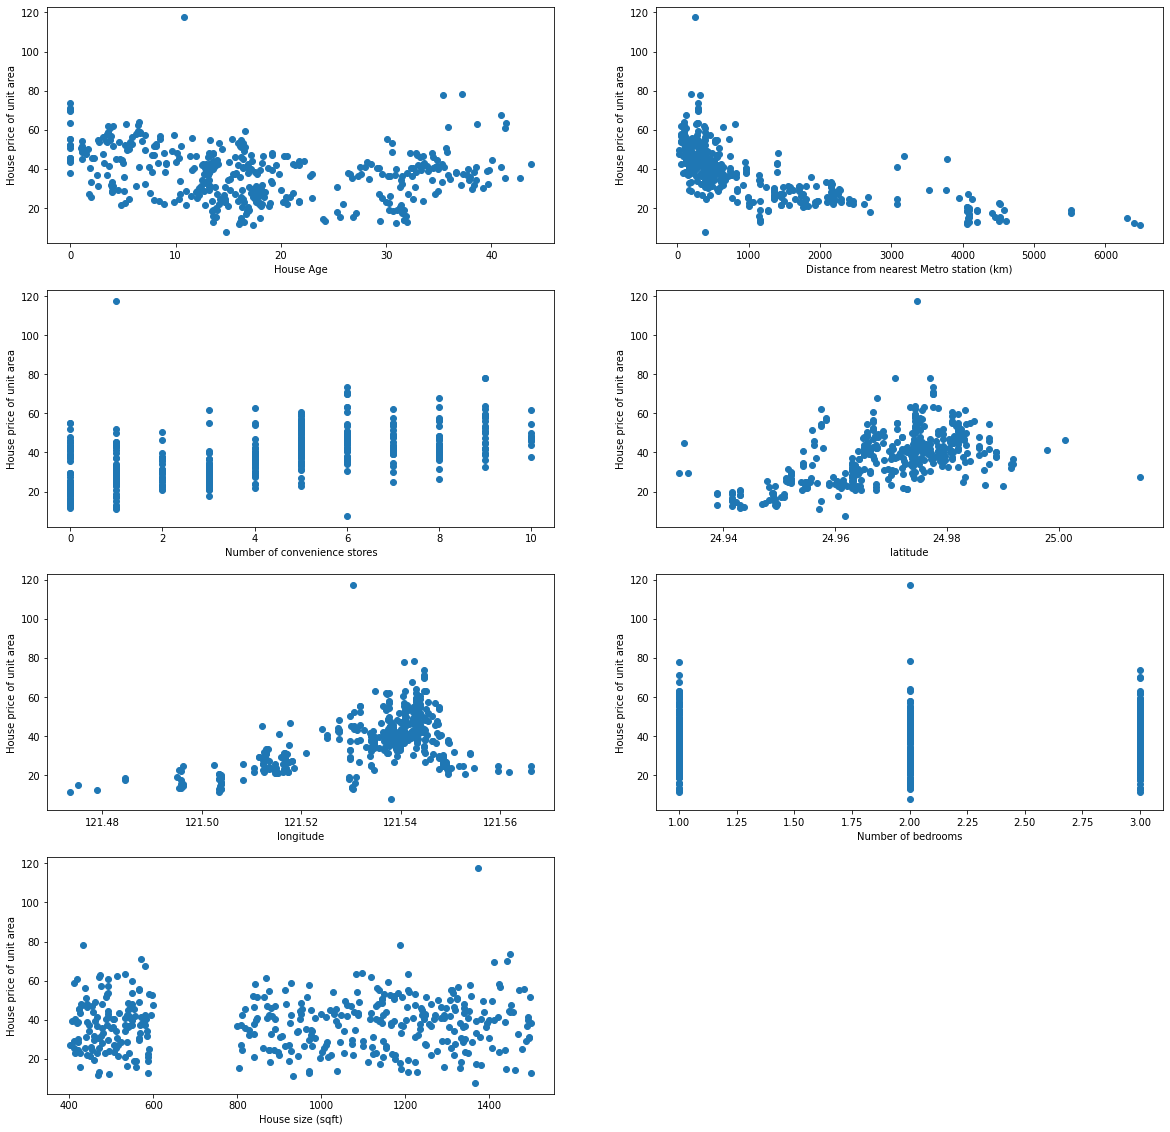

In [ ]:
i=0
plt.figure(figsize=(20,20))
for col in df.columns:
  if col=='Transaction date' or col=='House price of unit area':
    continue
  plt.subplot(420+1+i)
  plt.scatter(df[col],df['House price of unit area'])
  plt.xlabel(col)
  plt.ylabel("House price of unit area")
  i+=1
plt.show()

**Findings:**

Distance from metro station matters most. closer the station more the price.

Longitude 121.54 to 121.56 seems to be costly area.

The starting price of area is increasing as the number of convenience store increase.

**Model**

I would be using two models

    1. Linear regression

    2. RandomForest Regression

**Linear regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [ ]:
x=df[['House Age','Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]

y=df['House price of unit area']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
def metrics_output(y_test,y_pred):
  mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
  mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
  rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  return mae,mse,rmse

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred=regr.predict(X_test)

0.6913019530034124


In [ ]:
mae,mse,rmse=metrics_output(y_test,y_pred)
print("Linear Regression")
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Linear Regression
MAE: 4.4224720164389115
MSE: 29.618186368124395
RMSE: 5.4422593073212155


**Drawbacks:**

The assumption of linearity between dependent and independent variables

It is often quite prone to noise and overfitting

Linear regression is quite sensitive to outliers

It is prone to multicollinearity


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
y_pred=regressor.predict(X_test)
mae,mse,rmse=metrics_output(y_test,y_pred)
print("Random Forest Regressor")
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

0.6167800937855341
Random Forest Regressor
MAE: 4.955142857142855
MSE: 36.76822290476191
RMSE: 6.063680640070181


**Drawback:**

a large number of trees can make the algorithm too slow and ineffective for real-time predictions

**Comparison between the model:**

Random forest regressor is better than linear regressor in case of score. If we consider time then linear regressor is better

##**Part 2: Product matching**

**Problem statement:** 
Using ML/DL techniques, match similar products from the Flipkart dataset with the Amazon dataset. Once similar products are matched, display the retail price from FK and AMZ side by side. Please explore as many techniques as possible before choosing the final technique. 
You may either display the final result in single table format OR You may create a simple form where we input the product name and the output of prices of the product from both websites are displayed. 

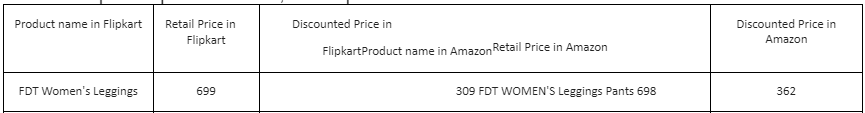

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_f=pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')
df_f.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
df_a=pd.read_csv('/content/amz_com-ecommerce_sample.csv',encoding='latin-1')
df_a.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [2]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 5.5 MB 19.9 MB/s 
     |████████████████████████████████| 1.3 MB 46.7 MB/s 
     |████████████████████████████████| 182 kB 59.5 MB/s 
     |████████████████████████████████| 7.6 MB 41.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9ac538aa41a91b54e27329b7ca7d57cc159f3a236038bf7d1a9b770796a2c0a8
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('stsb-roberta-large') #1.3 gb

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [8]:
# vectorize the data
df_f['product_name_embedding'] = df_f['product_name'].apply(bert.encode)

In [9]:
# vectorize the data
df_a['product_name_embedding'] =df_a['product_name'].apply(bert.encode)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_matrix(df,input_vector):
  cosine_matrix=[]
  cosine_matrix.append(df['product_name_embedding'].apply(lambda x: cosine_similarity(input_vector,x.reshape(-1,1))))
  return cosine_matrix

def max_cos(cosine_matrix):
  max_val=max(cosine_matrix)
  max_val_index=cosine_matrix.index(max_val)
  return max_val_index


In [14]:
from torch import values_copy
def result(product_name_vector):
  matrix_amazon=cos_matrix(df_a,product_name_vector.reshape(-1,1))
  max_val_index_amazon=max_cos(matrix_amazon)
  matrix_flipcart=cos_matrix(df_f,product_name_vector.reshape(-1,1))
  max_val_index_flipcart=max_cos(matrix_flipcart)
  record_amazon=df_a.iloc[max_val_index_amazon:max_val_index_amazon+1,:]
  record_flipcart=df_f.iloc[max_val_index_flipcart:max_val_index_flipcart+1,:]
  values=[record_amazon['product_name'].values[0],record_amazon['retail_price'].values[0],record_amazon['discounted_price'].values[0],
          record_flipcart['product_name'].values[0],record_flipcart['retail_price'].values[0],record_flipcart['discounted_price'].values[0]]
  df_res=pd.DataFrame(data=[values],columns=['Product Name In Flipcart','Retail Price on Flipcart','Discounted Price on Flipcart','Product Name In Amazon','Retail Price on Amazon','Discounted Price on Amazon'])
  return df_res

FDT Women's Leggings

In [15]:
product_name=input("Enter the product name: ")
product_name_vector=bert.encode(product_name)

Enter the product name: FDT Women's Leggings


In [16]:
result(product_name_vector)

,Product Name In Flipcart,Retail Price on Flipcart,Discounted Price on Flipcart,Product Name In Amazon,Retail Price on Amazon,Discounted Price on Amazon
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0


**What I did:**

Took the name column from both the files and created vectors from them then used cosine similarity to compare the name and found the index of matched vectors and then got records on that index and return both on the table format.